In [147]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [148]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [149]:
print('Total number of rows are ',df.shape[0])
print('Total number of columns are ',df.shape[1])

Total number of rows are  4340
Total number of columns are  8


In [150]:
print('The number of null values prsent in data set ','\n',df.isnull().sum())

The number of null values prsent in data set  
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [152]:
for col in df.columns:
    print('\n')
    print('coulmn name is - ', col)
    print('number of unique values present in this column is ', len(df[col].unique()))




coulmn name is -  name
number of unique values present in this column is  1491


coulmn name is -  year
number of unique values present in this column is  27


coulmn name is -  selling_price
number of unique values present in this column is  445


coulmn name is -  km_driven
number of unique values present in this column is  770


coulmn name is -  fuel
number of unique values present in this column is  5


coulmn name is -  seller_type
number of unique values present in this column is  3


coulmn name is -  transmission
number of unique values present in this column is  2


coulmn name is -  owner
number of unique values present in this column is  5


In [153]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [154]:
df = df.drop('name',axis=1)

In [155]:
df['years od old'] = 2022 - df['year']

In [156]:
df = df.drop('year',axis=1)

In [157]:
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['owner'] = le.fit_transform(df['owner'])

In [158]:
df.head(10)

,selling_price,km_driven,fuel,seller_type,transmission,owner,years od old
0,60000,70000,4,1,1,0,15
1,135000,50000,4,1,1,0,15
2,600000,100000,1,1,1,0,10
3,250000,46000,4,1,1,0,5
4,450000,141000,1,1,1,2,8
5,140000,125000,4,1,1,0,15
6,550000,25000,4,1,1,0,6
7,240000,60000,4,1,1,2,8
8,850000,25000,4,1,1,0,7
9,365000,78000,0,1,1,0,5


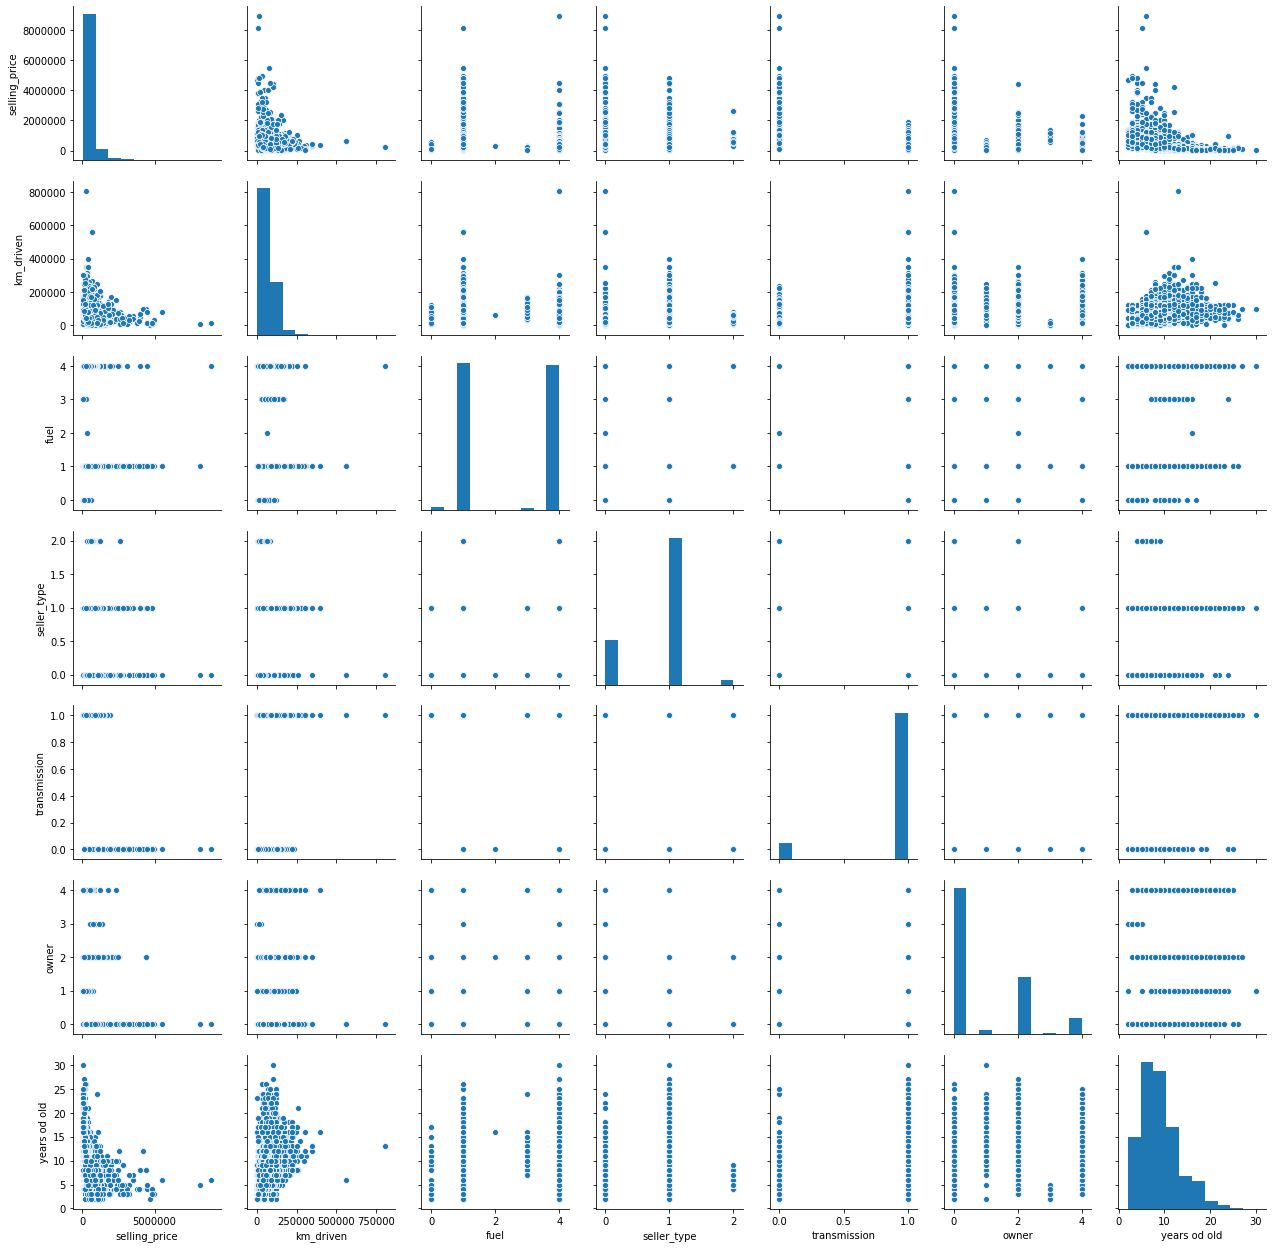

In [159]:
sns.pairplot(df)

In [160]:
df.corr()

,selling_price,km_driven,fuel,seller_type,transmission,owner,years od old
selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
years od old,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


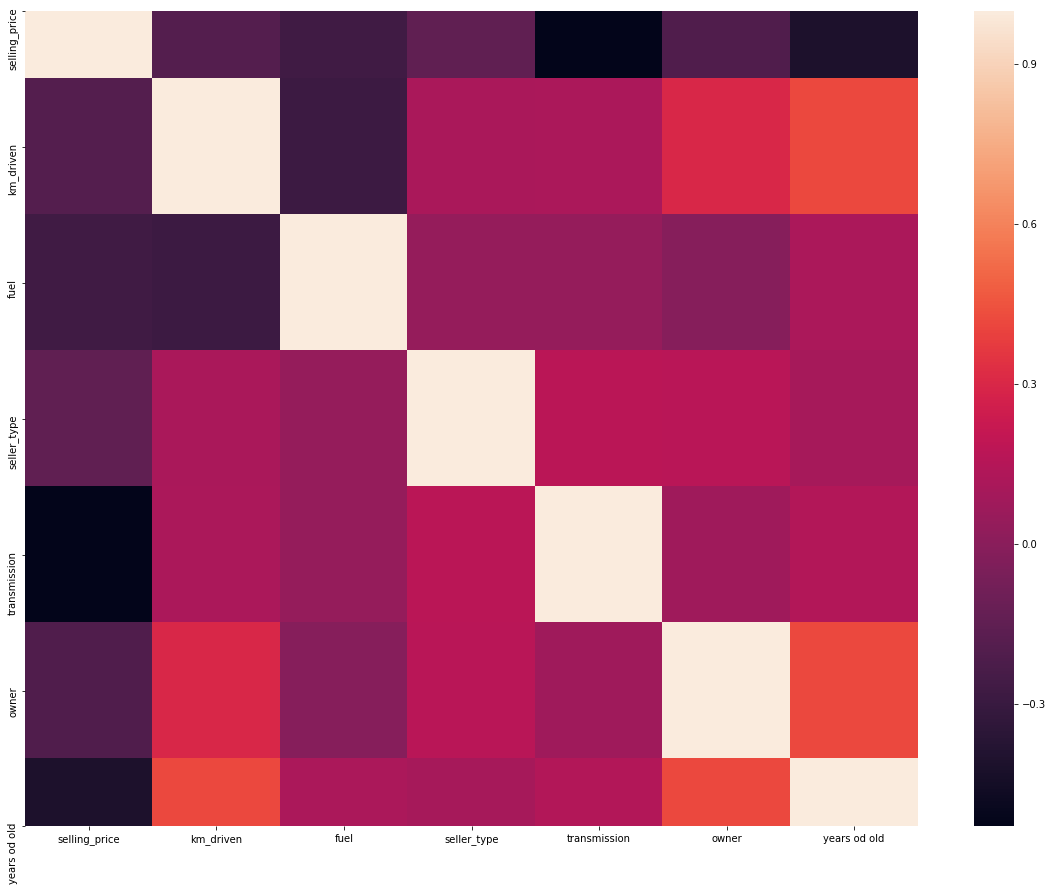

In [161]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

In [162]:
X=df.drop('selling_price',axis=1)
y=df['selling_price']
print(X.shape, y.shape)

(4340, 6) (4340,)


In [163]:
print(X.head())
print('\n',y.head())

   km_driven  fuel  seller_type  transmission  owner  years od old
0      70000     4            1             1      0            15
1      50000     4            1             1      0            15
2     100000     1            1             1      0            10
3      46000     4            1             1      0             5
4     141000     1            1             1      2             8

 0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64


In [164]:
model = ExtraTreesRegressor()
model = model.fit(X,y)
model.feature_importances_

array([0.24944833, 0.12977516, 0.05919859, 0.29283197, 0.03183652,
       0.23690944])

<BarContainer object of 6 artists>

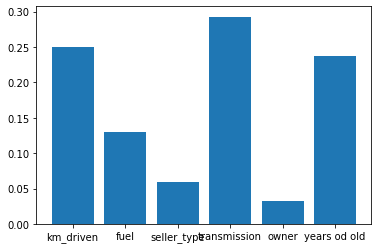

In [165]:
plt.bar(X.columns, model.feature_importances_)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3255, 6) (1085, 6) (3255,) (1085,)


In [167]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(100, 1200, 200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [168]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [169]:
rf_random = rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500; total time=   2.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estima

In [170]:
print('Model best parameters --> ', rf_random.best_params_ )
print('\n')
print('Model best score --> ', rf_random.best_score_)

Model best parameters -->  {'n_estimators': 900, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 25}


Model best score -->  -134137993593.21504


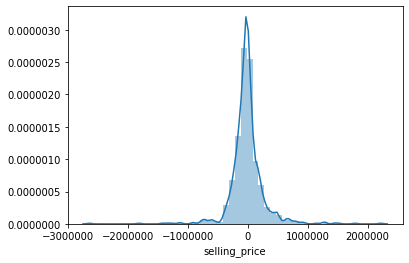

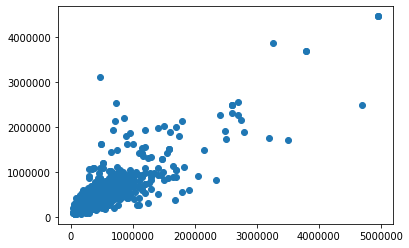

In [171]:
predictions=rf_random.predict(X_test)
sns.distplot(y_test-predictions)
plt.show()
plt.scatter(y_test,predictions)
plt.show()

In [172]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score:', metrics.r2_score(y_test, predictions))

MAE: 163158.3541547983
MSE: 79240536434.82944
RMSE: 281496.9563509159
r2_score: 0.7131759813220104


In [173]:
#Pickle file is a serielised file which is required for deployment
import pickle

file = open ('Vehiocle Price Prediction.pkl', 'wb')
#wb = writebytes mode

pickle.dump(rf_random,file)